# Processamento Digital de Imagens - Cap 10
<br><br>Professor: PAULO CESAR CORTEZ<br><br>
Aluno: Antônio Ricardo C. Alcântara Junior<br><br>
Esse notebook tem a simulação de algumas imagens do capítulo 10 do livro Processamento Digital de Imagens gonzalez 3 ed, Rafael C. Gonzalez <br><br>
Exemplos:
* <a href='#imagem1'> 10.22 </a>
* <a href='#imagem2'> 10.25 </a>

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from skimage.io import imread
from skimage.transform import rescale, resize
import imutils
import math
from skimage.filters import laplace

In [2]:
imagens = ['imagem1.tif', 'imagem2.tif']

# <p id= 'imagem1'>Imagem 10.22</p>

In [32]:
def limiarizacao(image):
  min = np.max(image)*0.8
  return (image - min)*255

In [24]:
def zero_cross(img, i, j, limiar=0):
    if j-1 >= 0 and i-1 >= 0 and j+1 < img.shape[1] and i+1 < img.shape[0]: #existencia de Diagonal superior esquerda e inferior direita
        if img[i-1, j-1]*img[i+1, j+1] < 0 and abs(img[i-1, j-1] - img[i+1, j+1]) >= limiar: 
            return 255
    if i-1 >= 0 and i+1 < img.shape[0]:
        if img[i-1, j]*img[i+1, j] < 0 and abs(img[i-1, j] - img[i+1, j]) >= limiar:
            return 255
    if j+1 < img.shape[1] and i-1 >= 0 and j-1 >= 0 and i+1 < img.shape[0]: 
        if img[i-1, j+1]*img[i+1, j-1] < 0 and abs(img[i-1, j+1] - img[i+1, j-1]) >= limiar:
            return 255
    if j-1 >= 0 and j+1 < img.shape[1]:
        if img[i, j-1]*img[i, j+1] < 0 and abs(img[i, j-1] - img[i, j+1]) >= limiar:
            return 255
    return 0

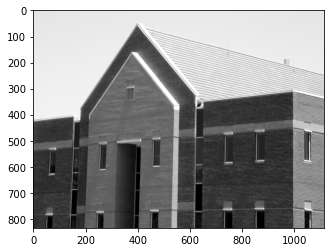

In [25]:
img = imread("entradas/"+imagens[0])
imgplot = plt.imshow(img, cmap='gray', vmin=0, vmax=255)

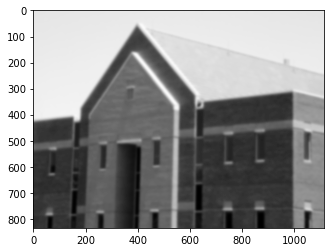

In [26]:
img2 = cv.GaussianBlur(img, (25, 25), 4)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

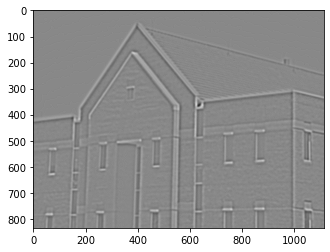

In [27]:
img3 = laplace(img2) + laplace(img2).min()
plt.imshow(img3, cmap='gray')

In [28]:
new_b = laplace(img2)
#Resultado do B
new_b

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.00392157,
        -0.00784314,  0.00784314],
       [ 0.        ,  0.        ,  0.        , ...,  0.00784314,
         0.00392157,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00392157,
         0.        ,  0.        ]])

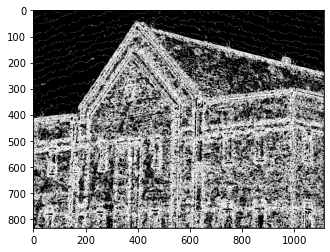

In [33]:
c = np.zeros(new_b.shape)
for i in range(new_b.shape[0]):
    for j in range(new_b.shape[1]):
        c[i,j] = zero_crossing(new_b, i, j)

plt.imshow(c, cmap='gray')

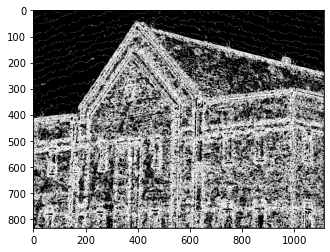

In [34]:
d = limiarizacao(c)
plt.imshow(d, cmap='gray')

# <p id= 'imagem1'>Imagem 10.25</p>

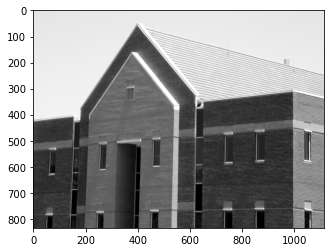

In [11]:
img = imread("entradas/"+imagens[1])
imshow(img, cmap='gray', vmin=0, vmax=255);